In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
script_dir = os.getcwd()
print(script_dir)
parent_dir = os.path.dirname(script_dir)

# 定义输出目录
output_dir = os.path.join(parent_dir, "Combo_output_RESULT")
os.makedirs(output_dir, exist_ok=True)

# 定义组合数量和文件路径
combos = ["one", "two", "three", "four", "five", "six"]
accuracy_files = [
    os.path.join(parent_dir, f'Combo_{n}_RESULT', f"accuracy_results_{n}_combinations.csv")
        for n in combos
    ]

# 初始化结果列表
accuracy_stats = []

# 提取每个组合数据集的准确率统计信息
print("Accuracy Statistics for Each Combo:")
for combo, file_path in zip(combos, accuracy_files):
    try:
        # 读取准确率文件
        df = pd.read_csv(file_path, encoding="utf-8", encoding_errors="ignore")
            
        # 转换为浮点数
        df['Test_Accuracy'] = pd.to_numeric(df['Test_Accuracy'], errors='coerce')
            
        # 检查文件是否包含必要列
        if 'Combination' not in df.columns or 'Test_Accuracy' not in df.columns:
            print(f"Error: {file_path} missing 'Combination' or 'Test_Accuracy' column, skipping")
            continue
            
        # 计算最小值、中值、最大值
        min_accuracy = df['Test_Accuracy'].min()
        median_accuracy = df['Test_Accuracy'].median()
        max_accuracy = df['Test_Accuracy'].max()
            
        # 获取最小和最大准确率对应的组合
        min_combination = df[df['Test_Accuracy'] == min_accuracy]['Combination'].iloc[0]
        max_combination = df[df['Test_Accuracy'] == max_accuracy]['Combination'].iloc[0]
            
        # 打印统计结果
        print(f"\nCombo {combo}:")
        print(f"  Minimum Accuracy: {min_accuracy:.3f} (Combination: {min_combination})")
        print(f"  Median Accuracy: {median_accuracy:.3f}")
        print(f"  Maximum Accuracy: {max_accuracy:.3f} (Combination: {max_combination})")
            
        # 添加统计结果
        accuracy_stats.append({
                'Combo': combo,
                'Combo_Name': combo,
                'Minimum_Accuracy': min_accuracy,
                'Minimum_Combination': min_combination,
                'Median_Accuracy': median_accuracy,
                'Maximum_Accuracy': max_accuracy,
                'Maximum_Combination': max_combination
            })
        
    except FileNotFoundError:
        print(f"Error: File {file_path} not found, skipping")
        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        continue

    # 保存统计结果到 CSV
stats_df = pd.DataFrame(accuracy_stats)
stats_save_path = os.path.join(output_dir, "accuracy_stats_by_combo.csv")
stats_df.to_csv(stats_save_path, index=False)
print(f"\nAccuracy statistics saved to {stats_save_path}")

e:\VS code project\Cross Attention for Combo\Combo
Accuracy Statistics for Each Combo:

Combo one:
  Minimum Accuracy: 0.447 (Combination: Sentiment)
  Median Accuracy: 0.451
  Maximum Accuracy: 0.453 (Combination: Length)

Combo two:
  Minimum Accuracy: 0.437 (Combination: sentiment_Suspense_Label)
  Median Accuracy: 0.447
  Maximum Accuracy: 0.463 (Combination: length_Suspense_Label)

Combo three:
  Minimum Accuracy: 0.438 (Combination: sentiment_length_Pronoun_Label)
  Median Accuracy: 0.448
  Maximum Accuracy: 0.456 (Combination: sentiment_Numeric_Label_Pronoun_Label)

Combo four:
  Minimum Accuracy: 0.438 (Combination: sentiment_Concreteness_Label_Numeric_Label_Suspense_Label)
  Median Accuracy: 0.451
  Maximum Accuracy: 0.458 (Combination: sentiment_Concreteness_Label_Suspense_Label_Pronoun_Label)

Combo five:
  Minimum Accuracy: 0.442 (Combination: sentiment_length_Numeric_Label_Suspense_Label_Pronoun_Label)
  Median Accuracy: 0.444
  Maximum Accuracy: 0.453 (Combination: sentim

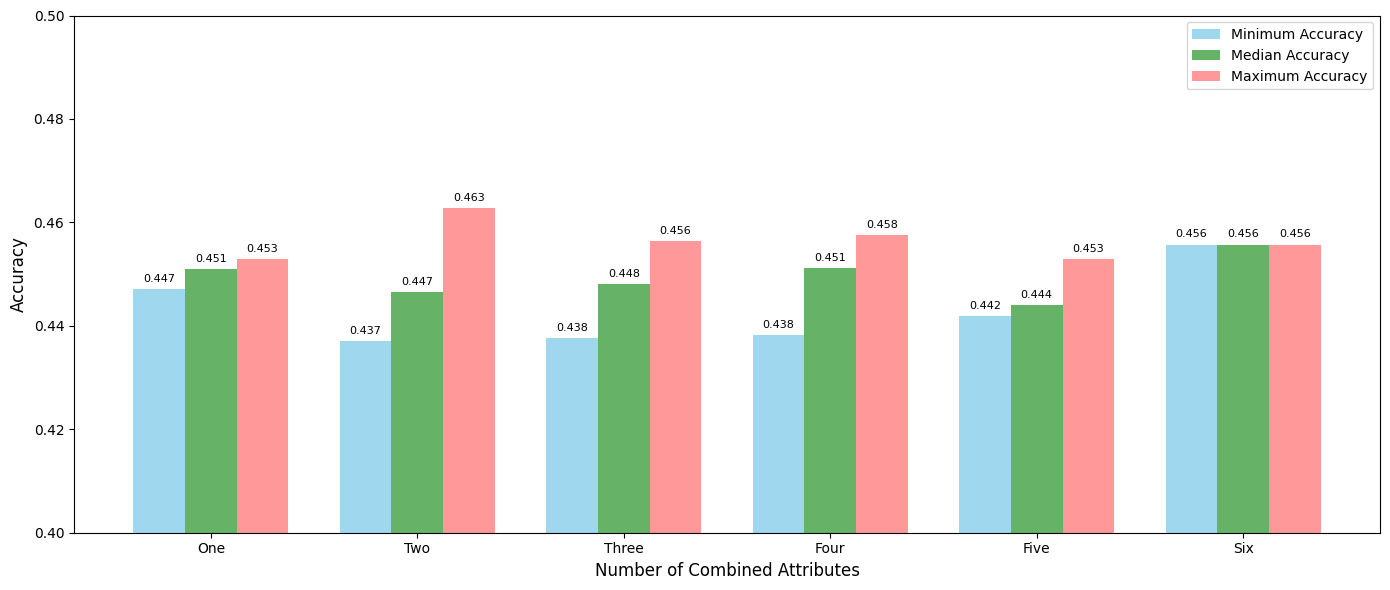

Bar plot saved to e:\VS code project\Cross Attention for Combo\Combo_output_RESULT\accuracy_different_Combo.png


In [4]:
max_accuracy_df = pd.read_csv(os.path.join(parent_dir, "Combo_output_RESULT", "accuracy_stats_by_combo.csv"))


# 可视化准确率统计
plt.figure(figsize=(14, 6))
bar_width = 0.25
x = np.arange(len(combos))
    
# 绘制柱状图
for idx, row in stats_df.iterrows():
    plt.bar(x[idx] - bar_width, row['Minimum_Accuracy'], width=bar_width, alpha=0.8, color='skyblue', label='Minimum Accuracy' if idx == 0 else None)
    plt.bar(x[idx], row['Median_Accuracy'], width=bar_width, alpha=0.6, color='green', label='Median Accuracy' if idx == 0 else None)
    plt.bar(x[idx] + bar_width, row['Maximum_Accuracy'], width=bar_width, alpha=0.4, color='Red', label='Maximum Accuracy' if idx == 0 else None)
        
    # 在柱子顶部标注准确率
    plt.text(x[idx] - bar_width, row['Minimum_Accuracy'] + 0.001, f'{row["Minimum_Accuracy"]:.3f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[idx], row['Median_Accuracy'] + 0.001, f'{row["Median_Accuracy"]:.3f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[idx] + bar_width, row['Maximum_Accuracy'] + 0.001, f'{row["Maximum_Accuracy"]:.3f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Number of Combined Attributes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.xticks(x, labels=['One', 'Two', 'Three', 'Four', 'Five', 'Six'])
plt.ylim(0.4, 0.5)
plt.legend()
plt.tight_layout()

# 保存和显示柱状图
plot_save_path = os.path.join(output_dir, "accuracy_different_Combo.png")
plt.savefig(plot_save_path, dpi=100)
plt.show()
print(f"Bar plot saved to {plot_save_path}")